# Part I - PISA Data
## by Boris Livshits


PISA Dataset contains results of PISA 2012 assesments or students of 65 economies in math, reading and science. 

#### Brief description

There are a lot of materials related to this dataset and results of assesment on OECD website - https://www.oecd-ilibrary.org/education/pisa-2012-assessment-and-analytical-framework_9789264190511-en

Dataset contains full list of answers, estimates and results of assesment. A lot of questions are in form of categorital data (i.e. "Agree"/"Disagree" and so on).

However, the suggested data dictionary doesn't provide sufficient description of dataset variables. More detailed description of questions and possible answers is here - https://read.oecd-ilibrary.org/education/pisa-2012-assessment-and-analytical-framework/background-questionnaires_9789264190511-9-en and here https://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf



## Preliminary Wrangling

### What is the structure of your dataset?

As we mentioned earlier - dataset conctains a lot of variables obtained from PISA assesment

### What is/are the main feature(s) of interest in your dataset?

We want to look deeper to results in math, reading and science and going to look are deeper - are there any factors that can determine/predict results?
There are 50 vartiables with results of test:
- 5 plausible values (PV) in math, reading and science (totally - 15 variables)
- 35 additional PV in subsections of math.
I must admire that theory behind PV is rather complicated (it is described here - https://www.oecd-ilibrary.org/docserver/9789264056275-7-en.pdf?expires=1673076434&id=id&accname=guest&checksum=61AEC646C2FA7383532899657DDFAD3D). That's why we are going to focus our attention on PV1 in math, reading and science, respectively. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 120)
pd.set_option('display.width', 1500)

> Load and brief description


In [2]:
pisa_raw_data=pd.read_csv('pisa2012.csv',encoding = "cp1252", low_memory=False)

In [3]:
#how many rows (observations) and how many columns (properties) do we have?
pisa_raw_data.shape

(485490, 636)

* #### We have about half million records (485,490 exactly) and 636 columns, i.e. different characteristics of the data. Really huge database.

* Our dataset is a set of answer of students and their parents all over the world - so it is highly likely that we have missing values. Let's check it:)

In [4]:
checking_miss_data=pisa_raw_data.isnull().sum()/pisa_raw_data.shape[0]

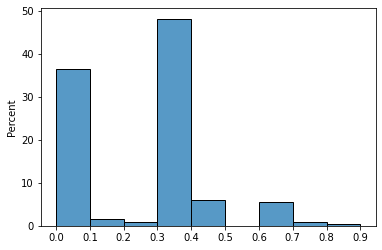

In [5]:
bins=np.arange(0,1,0.1)
plt.xticks(ticks=np.arange(0,1,0.1));
yticks=np.arange(0,51,10);
#ylabels = for y in yticks: '()%.'format(y)
plt.yticks(ticks=yticks);
sb.histplot(checking_miss_data, bins=bins, stat='percent');


### What does it mean?
around half of our data have missing values for 30-40% of variables. In other word, it means that for aproximatly 50% of records answers weren't given for 30-40% of questions. It rather big figure, so we have to take into account while we will provide any insights and conclusions based on data.
Most probably - answer were not given for some countries due to possible difference in assesment procedure.

In [6]:
#let's look how our data looks
pisa_raw_data.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUD

In [92]:
pisa_raw_data.tail()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUD

In [7]:
#database is so huge - it doesn't allow us to look deeper into details.
pisa_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB




### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Our dataset contains a lot of very interesting variables, so it not easy "to cut" our interest.
We are going to look how distribited values of different variables which could be interesting for us.


First of all - some parameters which can be correlated with results in math:
> 'ST62Q01' - Familiarity with Math Concepts - Exponential Function, and 'ST62Q19' - Familiarity with Math Concepts - Probability. 
possible answers - from 'Never heard of it' to 'Know it well, understand the concept'


In [8]:
pisa_raw_data['ST62Q01'].value_counts(normalize=True, dropna=False)

NaN                                      0.368712
Never heard of it                        0.242479
Heard of it once or twice                0.113829
Heard of it a few times                  0.107650
Heard of it often                        0.087623
Know it well,  understand the concept    0.079707
Name: ST62Q01, dtype: float64

In [9]:
pisa_raw_data['ST62Q19'].value_counts(normalize=True, dropna=False)

NaN                                      0.366148
Know it well,  understand the concept    0.283732
Heard of it often                        0.138013
Heard of it a few times                  0.084360
Never heard of it                        0.068125
Heard of it once or twice                0.059622
Name: ST62Q19, dtype: float64

for both variables share of NaN is about 37%, let's check if these NaN occure simultaneously.

In [10]:
pisa_raw_data[pisa_raw_data['ST62Q19'].isna()].ST62Q01.value_counts(normalize=True, dropna=False)

NaN                                      0.986667
Never heard of it                        0.005879
Heard of it once or twice                0.002593
Heard of it a few times                  0.002070
Heard of it often                        0.001513
Know it well,  understand the concept    0.001277
Name: ST62Q01, dtype: float64

So, it looks like if Q01 is NaN then Q19 is NaN too.
We should do not forget change datatype for these variables to categorical.

But now let's look for other variables that can be useful in our analysis.
> we want to see at 'ST69Q02' - duration of math lesson, it is open type question,
and ST70Q02 - how many math lessons are in week.


In [97]:
pisa_raw_data['ST69Q02'].value_counts(normalize=True, dropna=False)

NaN      0.384949
45.0     0.208280
50.0     0.128460
60.0     0.084451
40.0     0.062541
55.0     0.038196
90.0     0.018007
120.0    0.011034
75.0     0.010651
30.0     0.009205
35.0     0.008435
80.0     0.006515
70.0     0.005308
100.0    0.003166
65.0     0.002130
180.0    0.001530
20.0     0.001075
52.0     0.000917
48.0     0.000886
110.0    0.000760
53.0     0.000694
59.0     0.000659
160.0    0.000641
85.0     0.000641
58.0     0.000632
56.0     0.000616
54.0     0.000597
57.0     0.000587
72.0     0.000529
25.0     0.000470
42.0     0.000410
47.0     0.000398
43.0     0.000381
15.0     0.000381
105.0    0.000377
95.0     0.000301
150.0    0.000297
46.0     0.000290
68.0     0.000272
51.0     0.000247
49.0     0.000243
115.0    0.000210
62.0     0.000206
84.0     0.000204
88.0     0.000204
78.0     0.000194
44.0     0.000185
77.0     0.000167
37.0     0.000167
64.0     0.000165
38.0     0.000136
130.0    0.000117
82.0     0.000109
135.0    0.000103
63.0     0.000099
83.0     0

In [77]:
pisa_raw_data['ST70Q02'].value_counts(normalize=True, dropna=False)

NaN     0.385489
4.0     0.191689
5.0     0.157604
3.0     0.111765
6.0     0.054623
2.0     0.042773
7.0     0.019819
8.0     0.013096
1.0     0.008268
10.0    0.004538
9.0     0.004101
0.0     0.003638
12.0    0.000968
11.0    0.000630
14.0    0.000311
16.0    0.000146
13.0    0.000134
15.0    0.000130
20.0    0.000078
30.0    0.000049
18.0    0.000039
40.0    0.000027
17.0    0.000021
25.0    0.000010
34.0    0.000010
35.0    0.000010
22.0    0.000008
23.0    0.000008
19.0    0.000004
24.0    0.000004
31.0    0.000002
21.0    0.000002
32.0    0.000002
33.0    0.000002
Name: ST70Q02, dtype: float64

In [78]:
pisa_raw_data['ST69Q02'].describe()

count    298601.000000
mean         52.911273
std          17.007616
min          15.000000
25%          45.000000
50%          50.000000
75%          55.000000
max         180.000000
Name: ST69Q02, dtype: float64

In [79]:
pisa_raw_data['ST70Q02'].describe()

count    298339.000000
mean          4.350246
std           1.652565
min           0.000000
25%           3.000000
50%           4.000000
75%           5.000000
max          40.000000
Name: ST70Q02, dtype: float64

once again - about 38% of answers for both variables are missed, but possible it corresponds to missing data about others math related questions.
However, it seems that here we have some "incorrect" data. For example, zero lessons of math per week sounds unrealistic.
For purpore of our analysis, it'll be useful to create new variable - math learning time per week.

In [12]:
#create new variable 'math_time'
pisa_raw_data['math_time']=pisa_raw_data['ST69Q02']*pisa_raw_data['ST70Q02']
pisa_raw_data['math_time'].describe()

count    283303.000000
mean        226.007056
std          97.448421
min           0.000000
25%         180.000000
50%         220.000000
75%         250.000000
max        3000.000000
Name: math_time, dtype: float64

Also it may be useful to check:
> 'ST26Q06' - Possessions - Internet with possible answers Yes or No

In [99]:
pisa_raw_data['ST26Q06'].value_counts(normalize=True, dropna=False)

Yes    0.828112
No     0.146536
NaN    0.025352
Name: ST26Q06, dtype: float64

here we have relatively small number of NaN. However, most of students have internet connection at home, so it seems that just as simple dummy it doesn't determine something.
>Let's look on 'IC04Q01' - How old you are when you first accessed the Internet? with possible answer - '6 years old or younger', '7-9 years old', '10-12 years old', '13 years or older', 'I have never accessed the Internet'

In [24]:
pisa_raw_data['IC04Q01'].value_counts(normalize=True, dropna=False)

NaN                       0.389678
7-9 years old             0.233964
10-12 years old           0.217976
13 years old  or older    0.078539
6 years old or younger    0.075728
Never                     0.004115
Name: IC04Q01, dtype: float64

> one more variable of possible interest is 'ST28Q01' - 'How many books at home' with possible answers: 0-10 books, 11-25, 26-100, 101-200, 201-500, more than 500.

In [30]:
pisa_raw_data['ST28Q01'].value_counts(normalize=True, dropna=False)

26-100 books           0.278449
11-25 books            0.200488
0-10 books             0.195765
101-200 books          0.140786
201-500 books          0.101479
More than 500 books    0.058883
NaN                    0.024151
Name: ST28Q01, dtype: float64

### so, we are going to look how following veriables:
- ST62Q01 (knowing the concept of exponential function) - *categorical*
- math_time (minutes of math lessons in school per week) - *continuous*
- IC04Q01 (age at first time access the Internet) - *categorical*
- ST28Q01 (how many books at home) - *categorical*

can tell us something about possible test results -
- PV1MATH
- PV1READ
- PV1SCIE

In [13]:
#let's "cut" our dataset only to variables of out interest
pisa_data=pisa_raw_data[['PV1MATH','PV1READ','PV1SCIE','ST62Q01','math_time','IC04Q01','ST28Q01']]

We are going to convert categorical data into categories and order it - from worst to best. So, for example, we assune that earlier access to the Internet is better.

In [14]:
#before converting data to categorical datatupe, we have to do some preliminary work (I found it due to mistakes in next steps)
pisa_data.loc[:,'ST28Q01']=pisa_data['ST28Q01'].str.rstrip();


C:\Users\Livshits\AppData\Local\Temp\ipykernel_4692\2255024264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pisa_data.loc[:,'ST28Q01']=pisa_data['ST28Q01'].str.rstrip();


In [15]:
# convert categorical  into ordered categorical types
ordinal_var_dict = {
    "ST62Q01": ["Never heard of it", "Heard of it once or twice", "Heard of it a few times", "Heard of it often", "Know it well,  understand the concept"],
    "IC04Q01": ["Never","13 years old  or older", "10-12 years old", "7-9 years old", "6 years old or younger"],
    "ST28Q01": ["0-10 books", "11-25 books", "26-100 books", "101-200 books", "201-500 books", "More than 500 books"],
}

# set and order categories

for col in ordinal_var_dict:
    pisa_data[col]=pisa_data[col].astype("category")
    pisa_data[col]=pisa_data[col].cat.set_categories(ordinal_var_dict[col], ordered=True)

C:\Users\Livshits\AppData\Local\Temp\ipykernel_4692\3632817947.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pisa_data[col]=pisa_data[col].astype("category")
C:\Users\Livshits\AppData\Local\Temp\ipykernel_4692\3632817947.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pisa_data[col]=pisa_data[col].cat.set_categories(ordinal_var_dict[col], ordered=True)
C:\Users\Livshits\AppData\Local\Temp\ipykernel_4692\3632817947.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [16]:
for col in ordinal_var_dict:
    display(pisa_data[col].cat.categories)

Index(['Never heard of it', 'Heard of it once or twice', 'Heard of it a few times', 'Heard of it often', 'Know it well,  understand the concept'], dtype='object')

Index(['Never', '13 years old  or older', '10-12 years old', '7-9 years old', '6 years old or younger'], dtype='object')

Index(['0-10 books', '11-25 books', '26-100 books', '101-200 books', '201-500 books', 'More than 500 books'], dtype='object')

In [17]:
mean_score = np.round(pisa_data[['PV1MATH','PV1READ','PV1SCIE']].mean(), 2)
mean_score

PV1MATH    469.62
PV1READ    472.00
PV1SCIE    475.77
dtype: float64

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


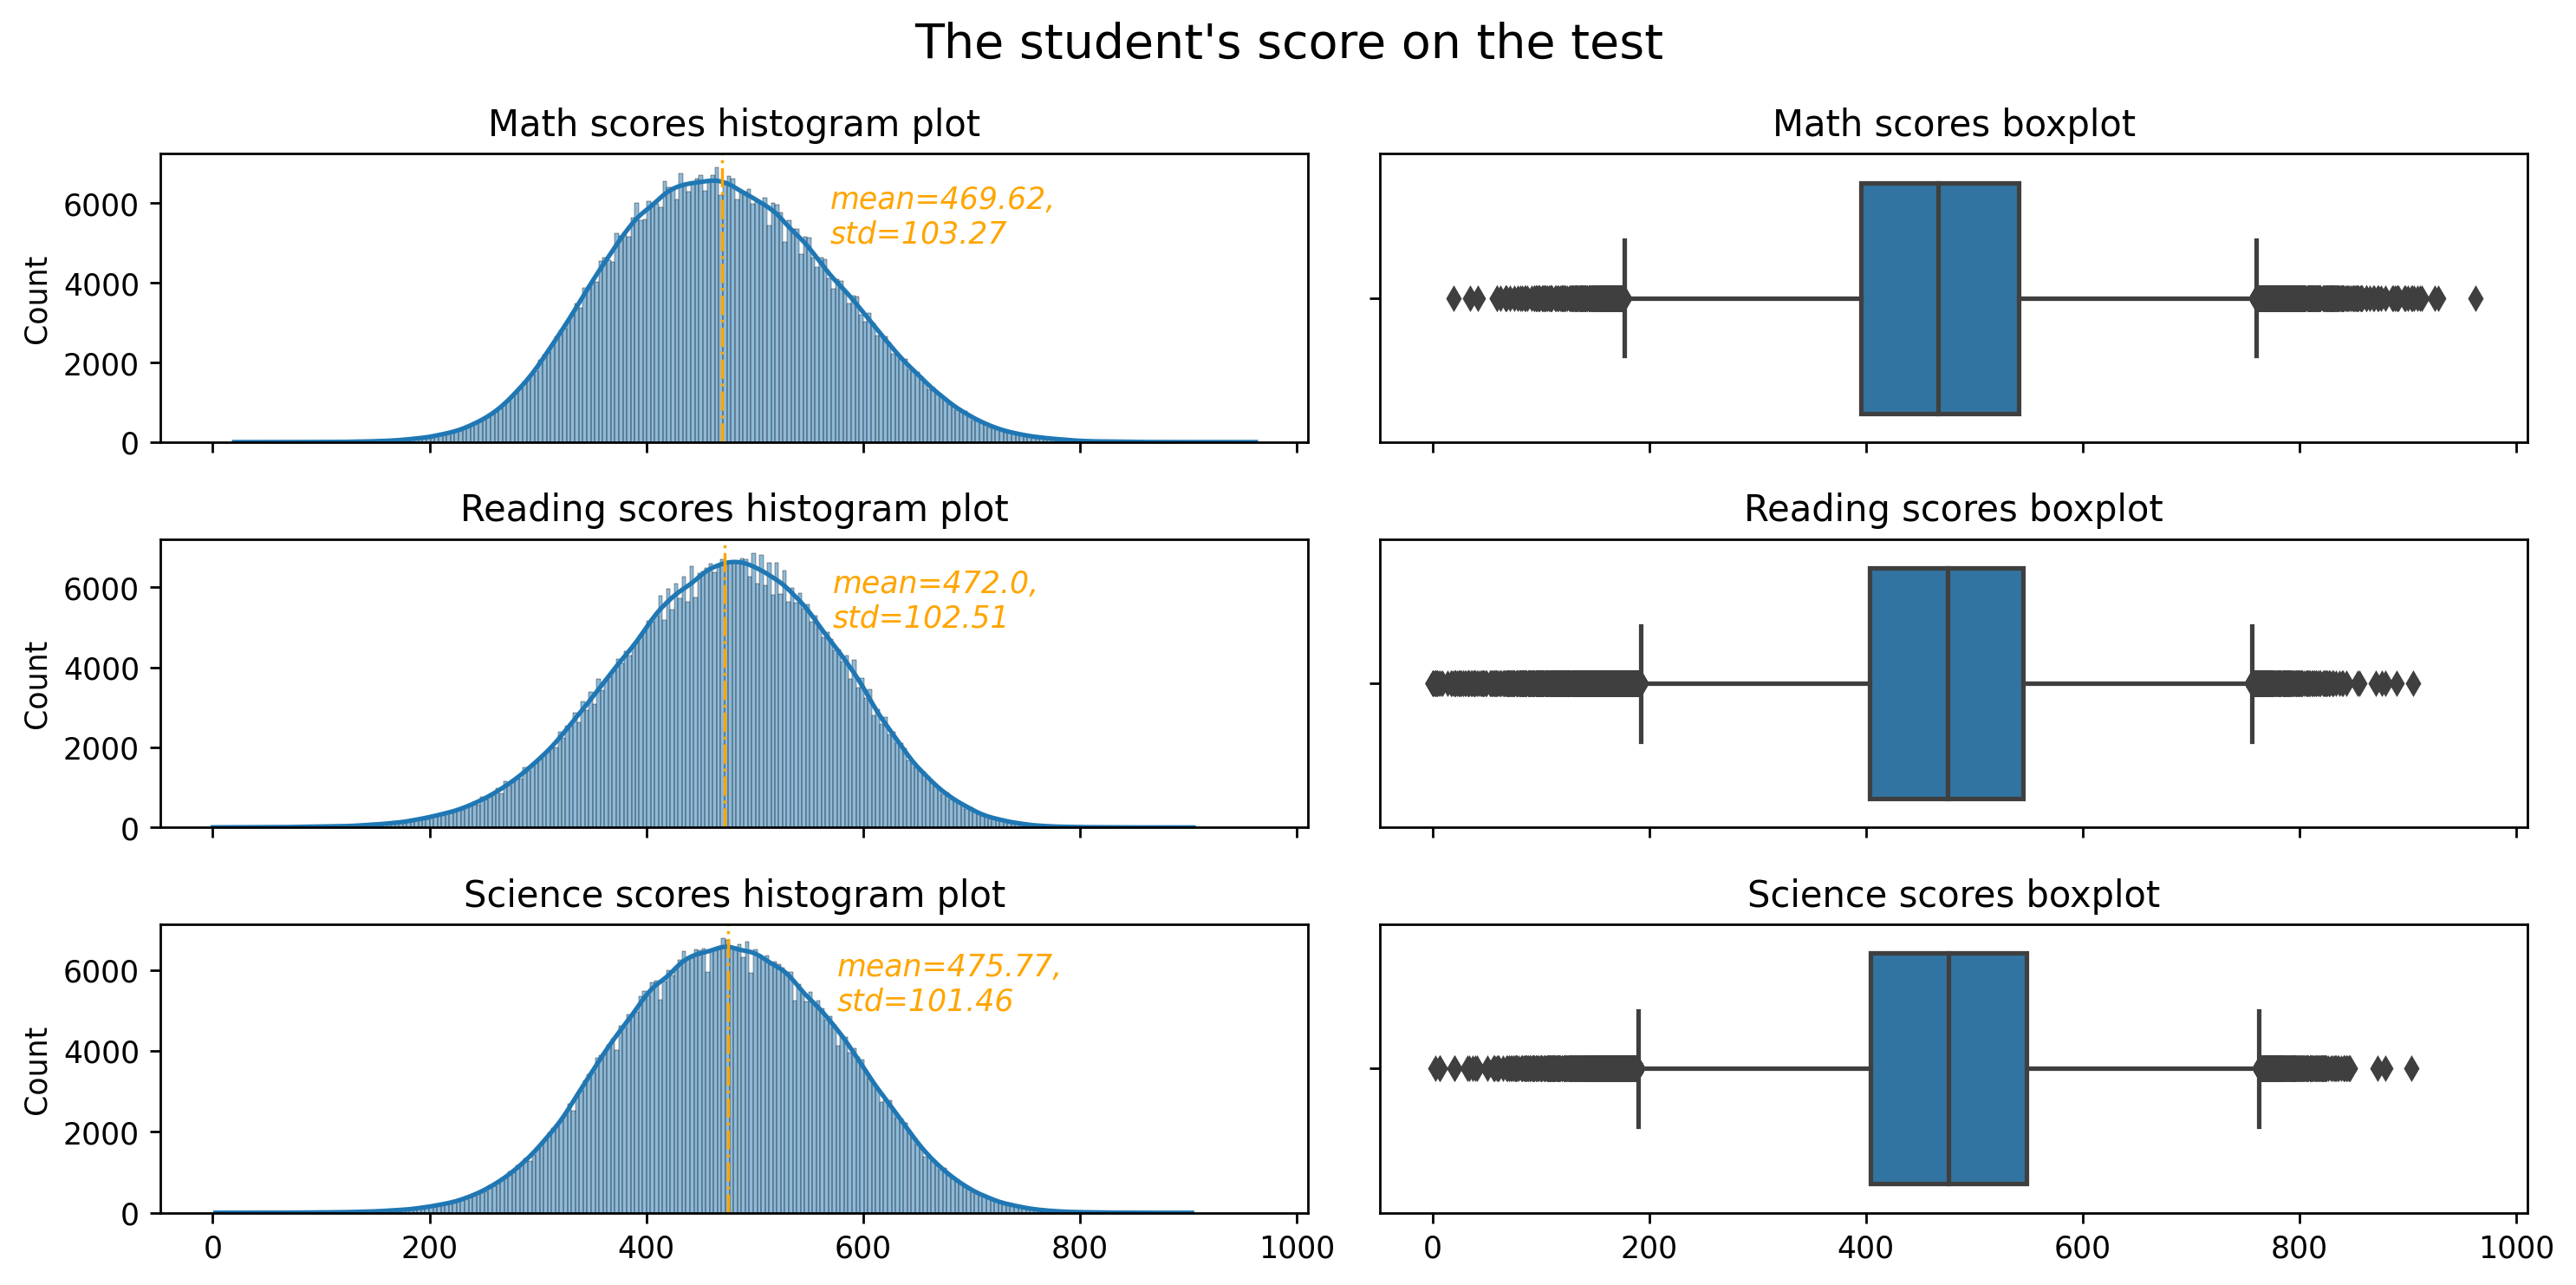

In [18]:
# creating 6 subplots 
fig, axes = plt.subplots(3, 2, figsize=[12, 6], dpi=250, sharex=True)
#fig, axes = plt.subplots(3, 2, figsize=[12, 6], dpi=250)

# main title:
fig.suptitle("The student's score on the test", fontsize=16)

# the plots:
sb.histplot(data=pisa_data, x="PV1MATH", ax=axes[0][0], kde=True)
sb.boxplot(data=pisa_data, x="PV1MATH", ax=axes[0][1])
sb.histplot(data=pisa_data, x="PV1READ", ax=axes[1][0], kde=True)
sb.boxplot(data=pisa_data, x="PV1READ", ax=axes[1][1])
sb.histplot(data=pisa_data, x="PV1SCIE", ax=axes[2][0], kde=True)
sb.boxplot(data=pisa_data, x="PV1SCIE", ax=axes[2][1])


mean_score = np.round(pisa_data[['PV1MATH','PV1READ','PV1SCIE']].mean(), 2)
std_score = np.round(pisa_data[['PV1MATH','PV1READ','PV1SCIE']].std(), 2)
# histogram customization:
axes[0][0].axvline(mean_score['PV1MATH'], color="orange", linestyle="-.", linewidth=1)
axes[0][0].text(x=mean_score['PV1MATH'] + 100, y=5000, s=f"mean={mean_score['PV1MATH']},\n"+f"std={std_score['PV1MATH']}"
                , style="italic", color="orange")
axes[1][0].axvline(mean_score['PV1READ'], color="orange", linestyle="-.", linewidth=1)
axes[1][0].text(x=mean_score['PV1READ'] + 100, y=5000, s=f"mean={mean_score['PV1READ']},\n"+f"std={std_score['PV1READ']}"
                , style="italic", color="orange")
axes[2][0].axvline(mean_score['PV1SCIE'], color="orange", linestyle="-.", linewidth=1)
axes[2][0].text(x=mean_score['PV1SCIE'] + 100, y=5000, s=f"mean={mean_score['PV1SCIE']},\n"+f"std={std_score['PV1SCIE']}"
                , style="italic", color="orange")

# titles and labels
axes[0][0].set_title("Math scores histogram plot")
axes[0][1].set_xlabel("")
axes[0][1].set_title("Math scores boxplot")
axes[1][0].set_title("Reading scores histogram plot")
axes[1][1].set_xlabel("")
axes[1][1].set_title("Reading scores boxplot")
axes[2][0].set_title("Science scores histogram plot")
axes[2][0].set_xlabel("")
axes[2][1].set_xlabel("")
axes[2][1].set_title("Science scores boxplot")
plt.tight_layout()
plt.savefig("score.png")

### What we can say about test scores?

* the first and, probably, most important - all three scores is normally distributed
* reading scores looks slightly left-skewed, while math scores - slightly right skewed.

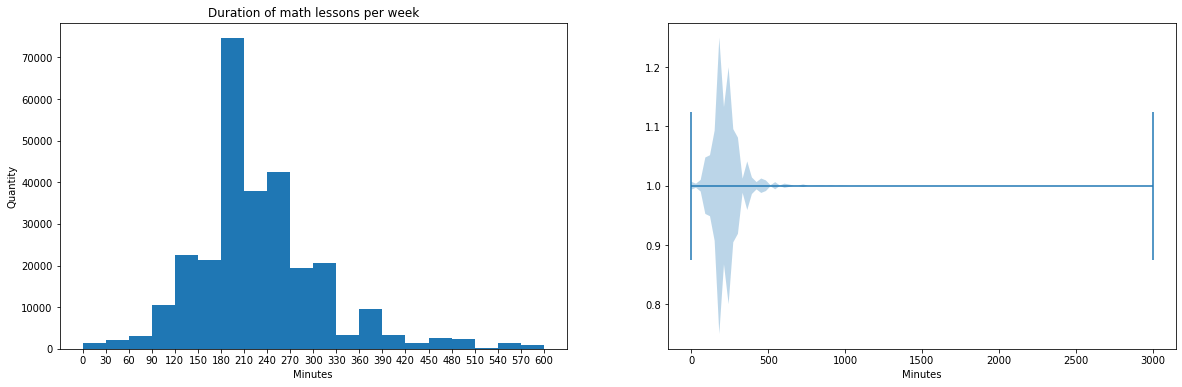

In [19]:
fig, axes = plt.subplots(1,2, figsize=[20, 6])
bins=np.arange(0,601,30)
axes[0].set_xticks(ticks=np.arange(0,601,30));
axes[0].set_title('Duration of math lessons per week');
axes[0].set_xlabel('Minutes');
axes[0].set_ylabel('Quantity');
axes[0].hist(data=pisa_data, x='math_time',bins=bins);
#violinplot and boxplot in pyplot don't work correcty with data with NaN, so we have to remove NaNs to draw violinplot.
axes[1].violinplot(pisa_data[pisa_data['math_time'].isna()==False].math_time, vert=False);
axes[1].set_xlabel('Minutes');


It's clear that some data should be considered as "low-quality" data, typical working week is about 40 hours, that's whay highly unlikely to have about 50 hours of math per week!
Seem's reasonable to remove all data with math_time more than 10 hours (600 minutes) per week.
On the other hand, minimal duration of lesson is 15 minutes, so it's reasonable to suppose that overall duration couldn't be less than 30 minutes per week. 

In [20]:
drop_indexes=pisa_data[(pisa_data['math_time']>600)|(pisa_data['math_time']<30)].index
((pisa_data['math_time']>600)|(pisa_data['math_time']<30)).sum()
((pisa_data['math_time']>600)|(pisa_data['math_time']<30)).sum()/pisa_data.shape[0]

0.006924962409112443

In [21]:
pisa_data.drop(drop_indexes,inplace=True)

C:\Users\Livshits\AppData\Local\Temp\ipykernel_4692\1480749985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pisa_data.drop(drop_indexes,inplace=True)


As we mentioned earlier - for several categorical variables we have about 35%-40% of missing data, let's have a look - if we drop such record will it change the distribution of our "variables of interest" 

In [22]:
pisa_data.isnull().sum()/pisa_data.shape[0]

PV1MATH      0.000000
PV1READ      0.000000
PV1SCIE      0.000000
ST62Q01      0.371070
math_time    0.419364
IC04Q01      0.388855
ST28Q01      0.024201
dtype: float64

count     482128
unique         2
top         True
freq      306677
dtype: object

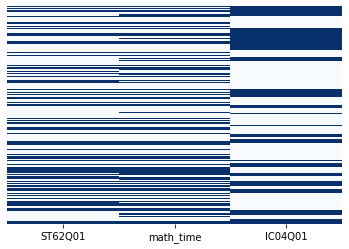

In [23]:
sb.heatmap(pisa_data[['ST62Q01','math_time','IC04Q01']].isnull(),cmap="Blues",yticklabels=False,cbar=False);
missed_data=pisa_data['ST62Q01'].isnull()|pisa_data['math_time'].isnull()|pisa_data['IC04Q01'].isnull()
missed_data.describe()

It's a pity, but NaN for IC04Q01 (age at first time access the Internet) often has NaN when math-related questions aren't missed.
So, we are not going to drop all records with NaN from our dataset.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* Frankly speaking, test results doesn't have any unusual points - all of them is normally distributed. So we don't need to do any transformation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Yes, we changed data type to categorical - for categorical variables:
- ST62Q01 (knowing the concept of exponential function) 
- IC04Q01 (age at first time access the Internet)
- ST28Q01 (how many books at home)

Secondly, we construct a new variable - overall time for math per week. It is a product of two variables - ST69Q02 and ST70Q02 (duration of math lesson and how many math lessons per week students have). Moreover, we drop all records with total duration more than 10 hours and less than 30 minutes - total 3362 records (about 0.7%).  

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Categorical variables

In [24]:
categ_dict={
    'ST62Q01':'PV1MATH',
    'ST28Q01':'PV1READ',
    'IC04Q01':'PV1SCIE'
}
labels={
    'ST62Q01':['Test in Math','Knowing exponenta'],
    'ST28Q01':['Test in Reading','How many books at home'],
    'IC04Q01':['Test in Science','Internet at Age']
}


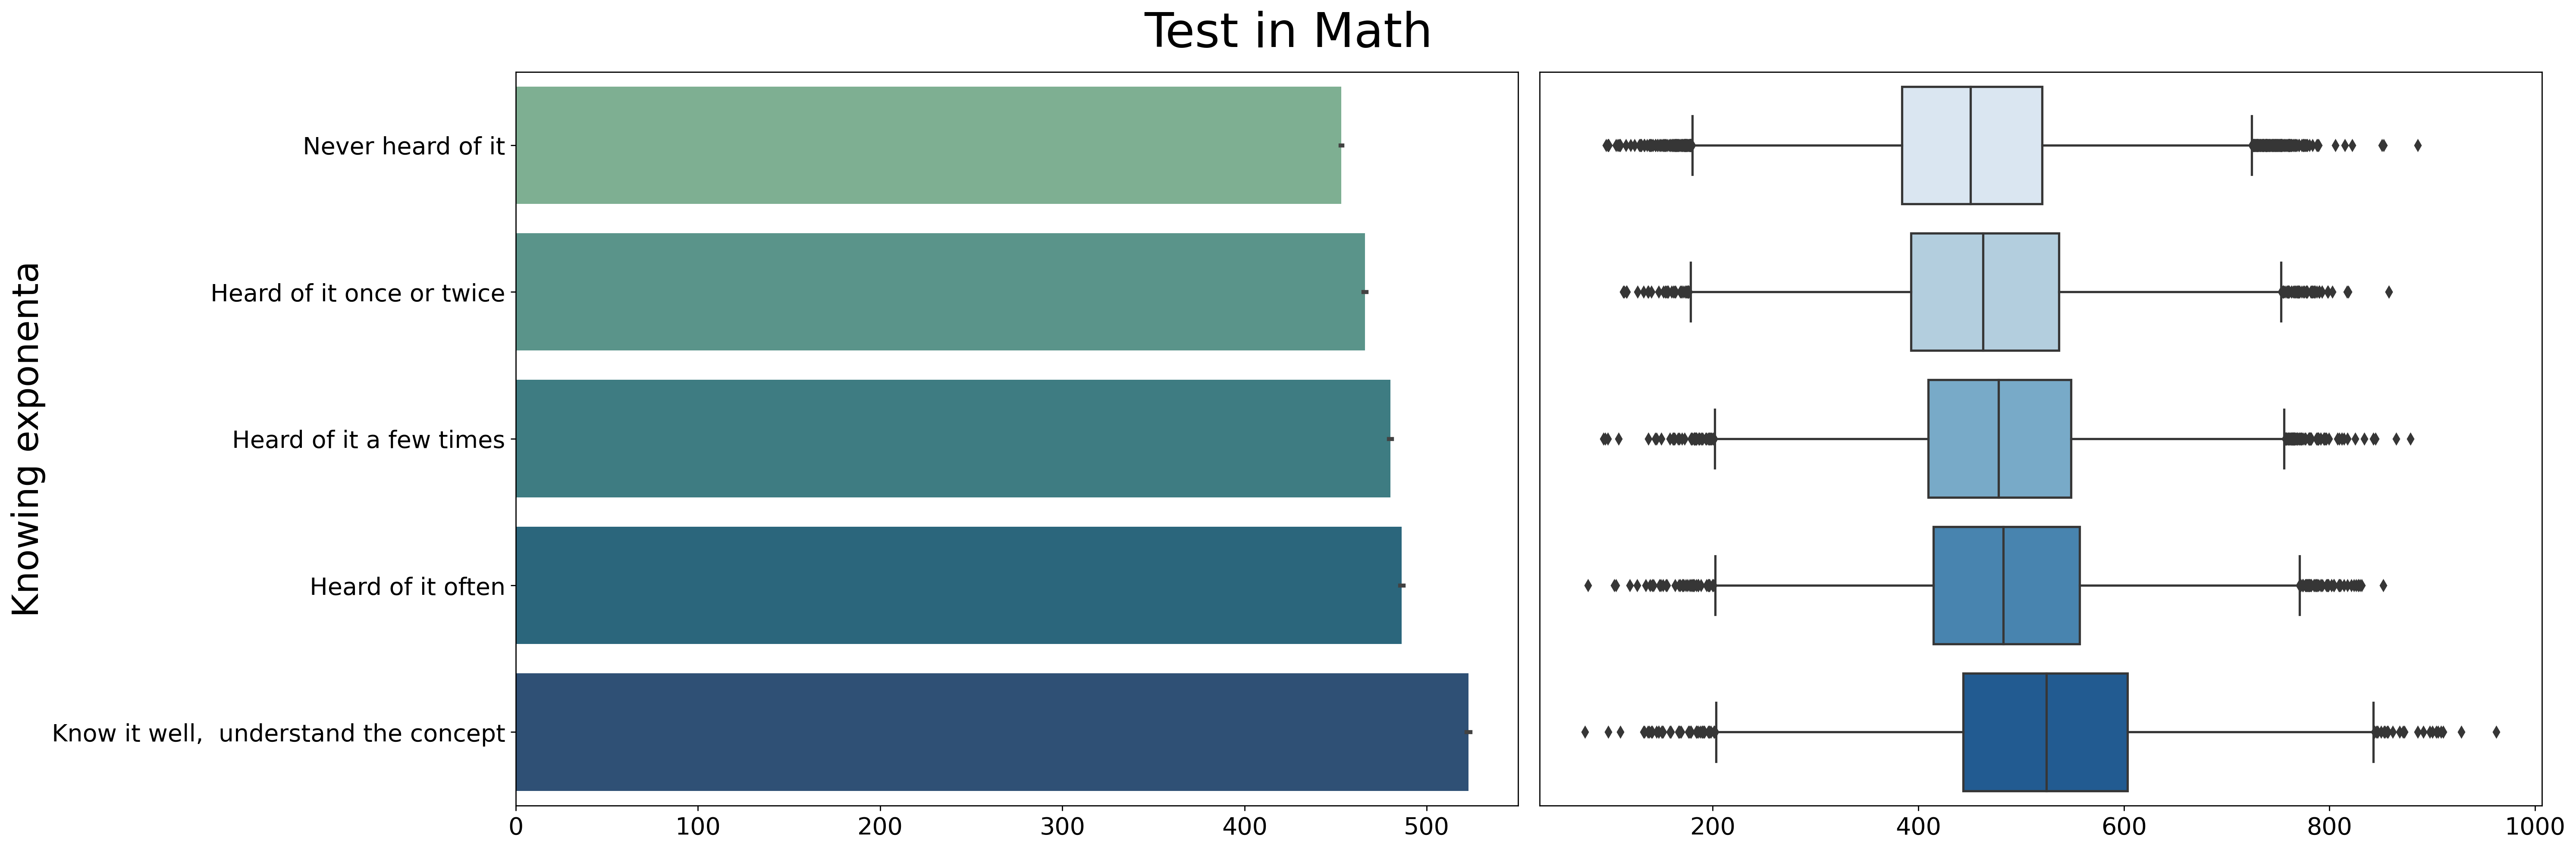

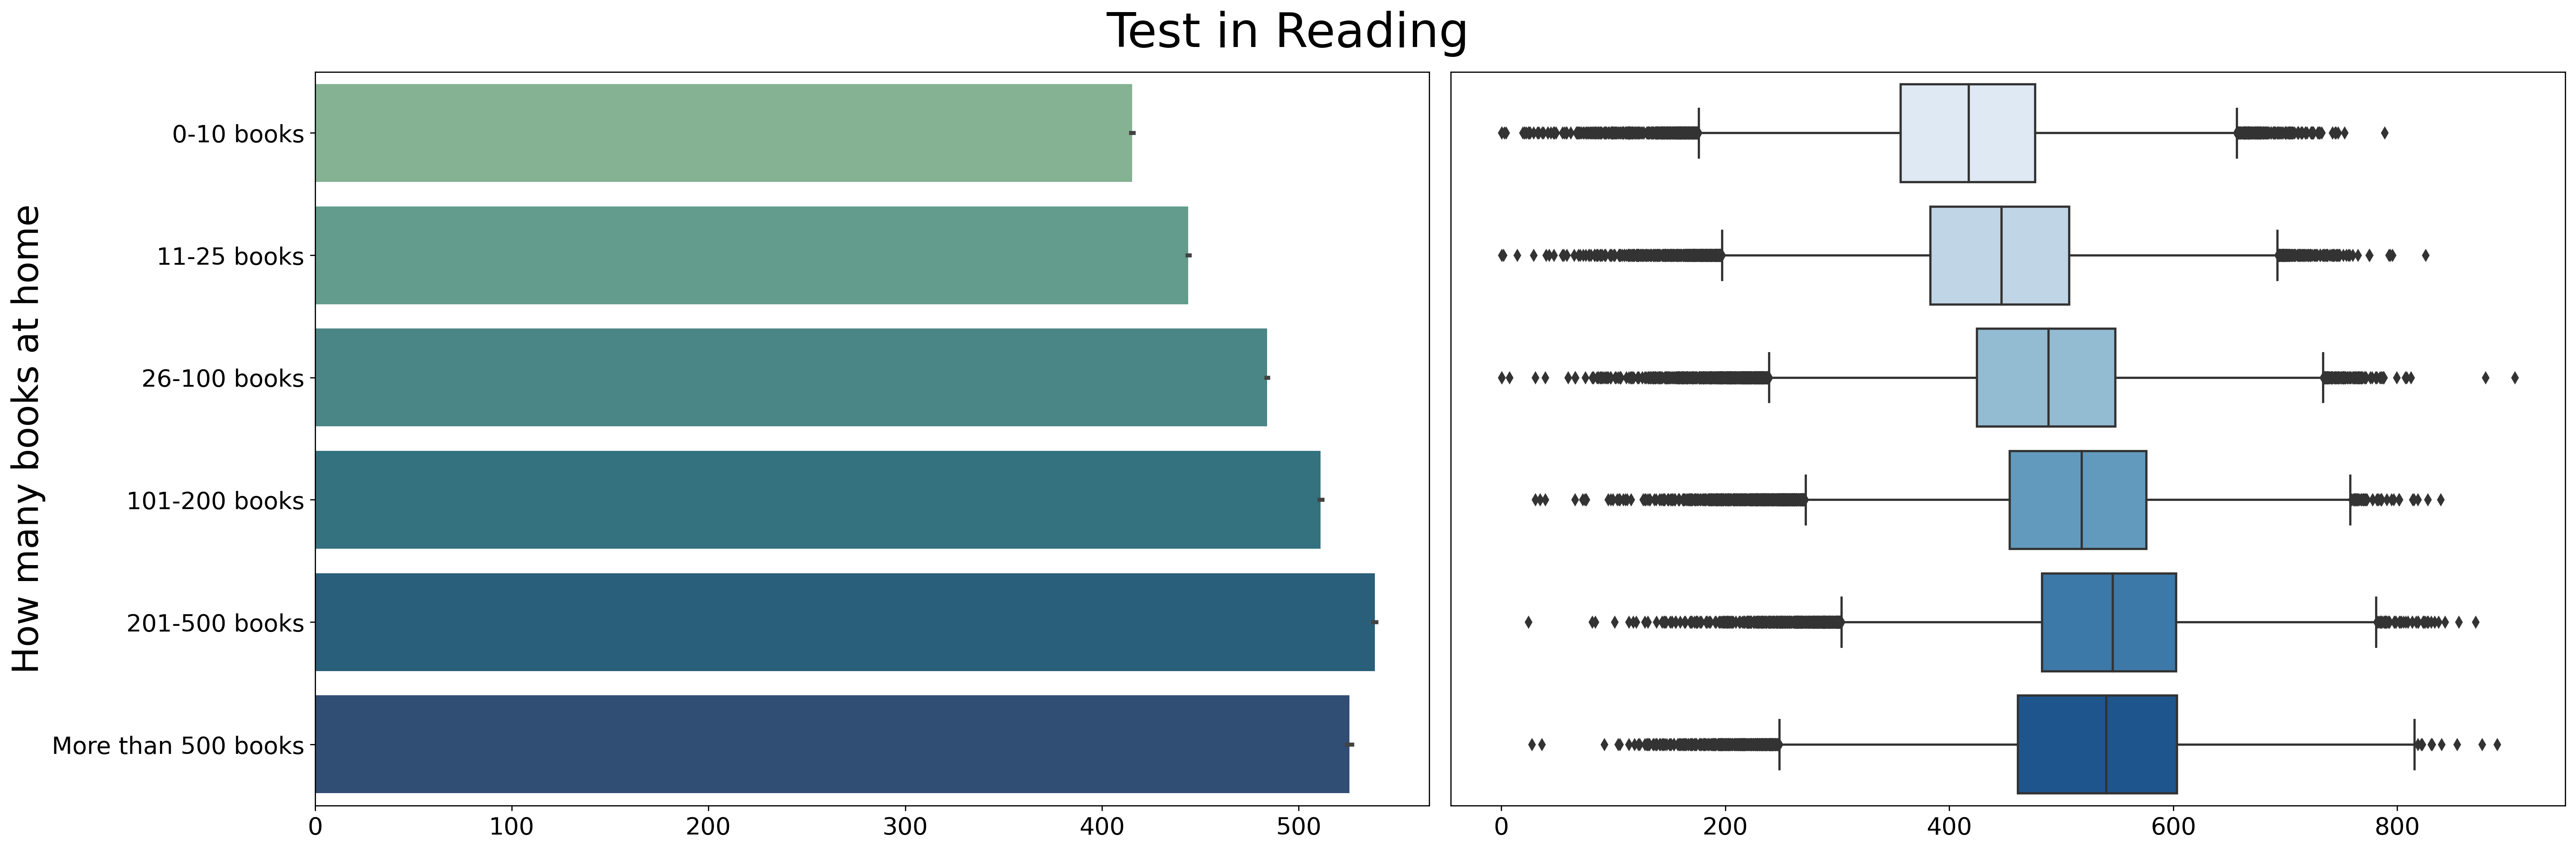

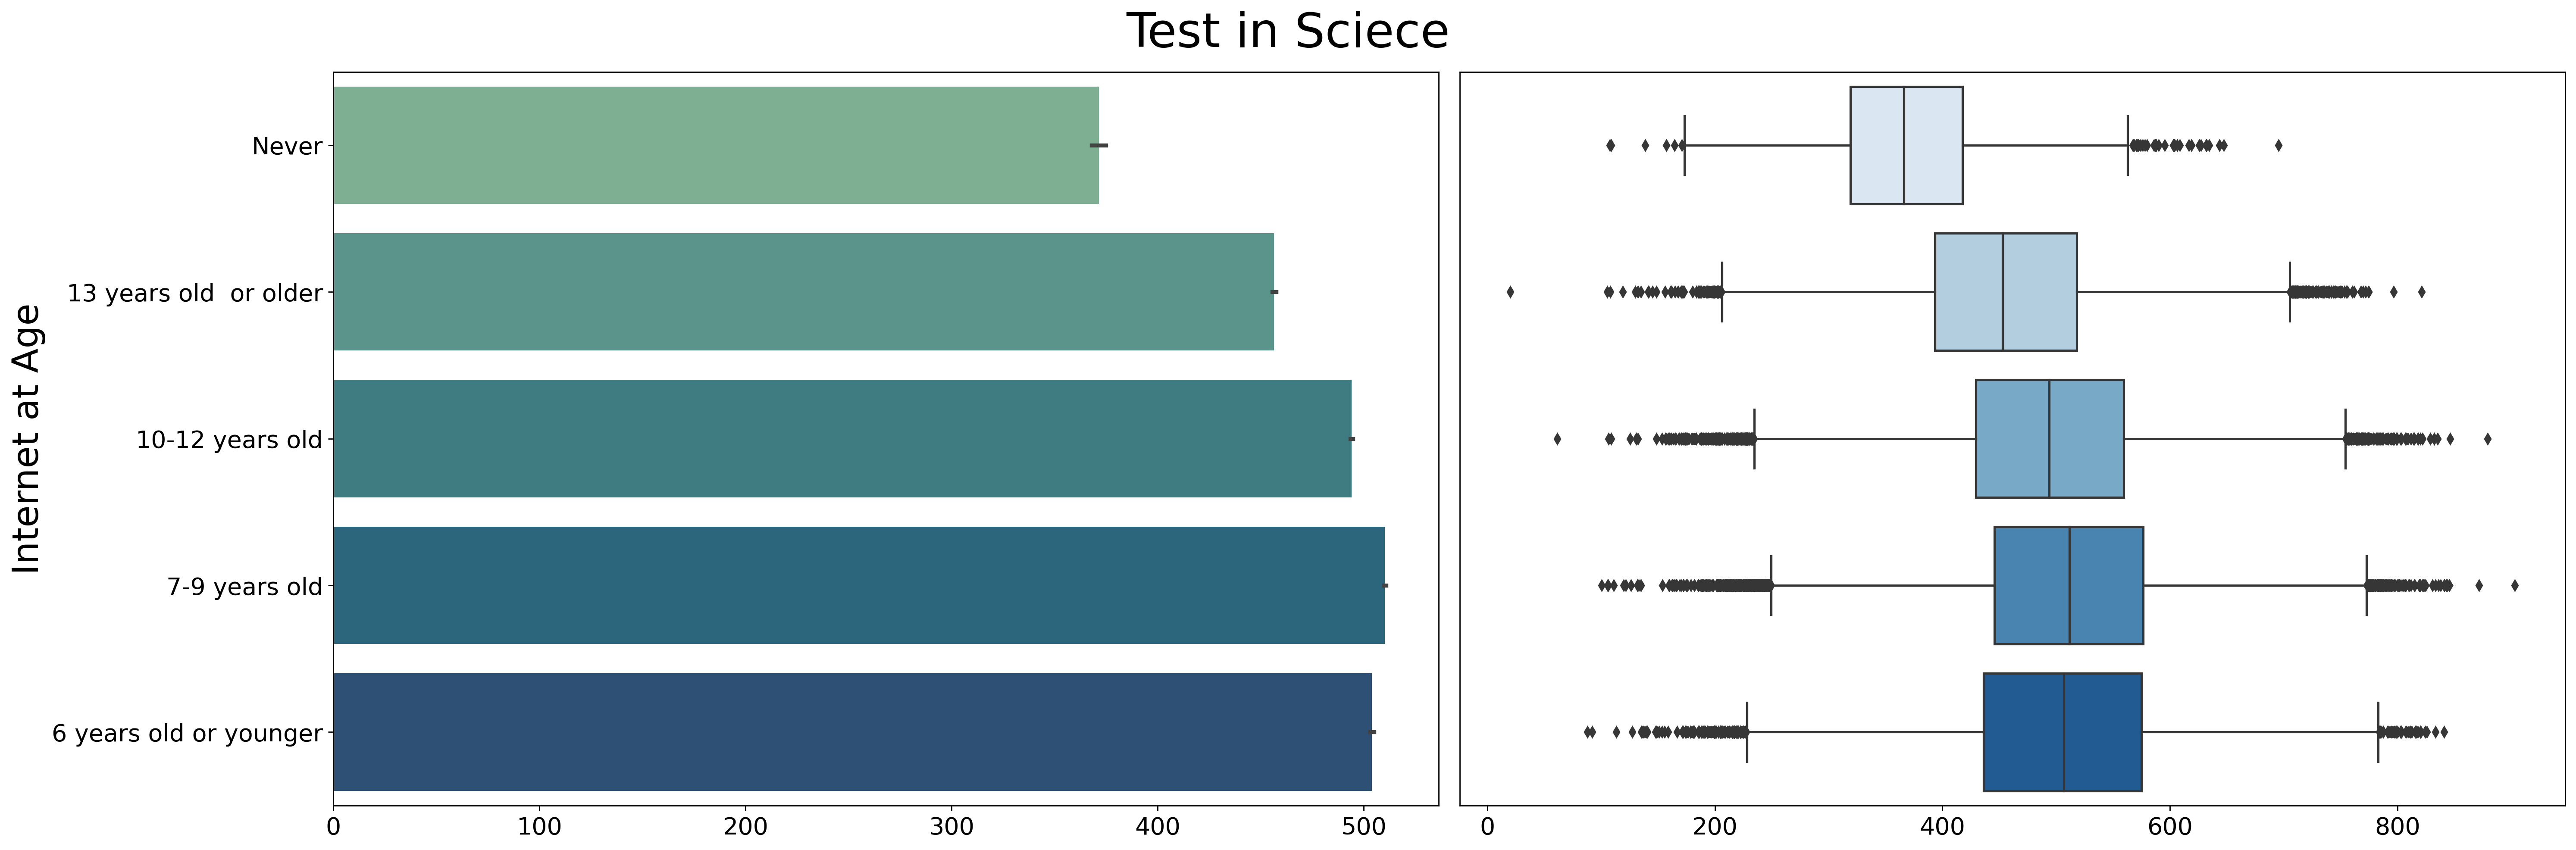

In [25]:
for key, value in categ_dict.items():
    fig, axes = plt.subplots(1, 2, figsize=[24, 8], dpi=250)
    fig.suptitle(labels[key][0], fontsize=32)
    sb.barplot(data=pisa_data, y=key, x=value, ax=axes[0], palette="crest")
    sb.boxplot(data=pisa_data, x=value, y=key, ax=axes[1], palette="Blues")
    axes[0].tick_params(axis='both', which='both', labelsize=16)
    axes[1].tick_params(axis='both', which='both', labelsize=16)
    axes[0].set_ylabel(labels[key][1], fontsize=24)
    axes[0].set_xlabel("")
    axes[1].set_xlabel("")
    axes[1].set_ylabel("")
    axes[1].set_yticks([])
    plt.tight_layout()
    

plt.savefig("bivar2.png")

A couple of comments:
* results of math test and knowlegde of exponentional function don't look surprisingly - better knowledge corresponds with better results.
* in reading test we have something unexpected - group with 200-500 books at home show on average higher results than the group with 500+ books at home. There can be several expanations:
>* first of all - it maybe difficult to estimate how many books you have, so, maybe some students, didn't provide accurate answers.
>* secondly, quantity doesn't mean quality - if you have books at home it doesn't necessary mean that you are reading them.
>* probable some kind of "threshold" maybe 100 books at home.
* in science we see that student without access to Internet show suffiently lower results in test. However, the difference between early age access and access in early tineage seems to be relatively small.

Now, let's look to math time per week and test results in math

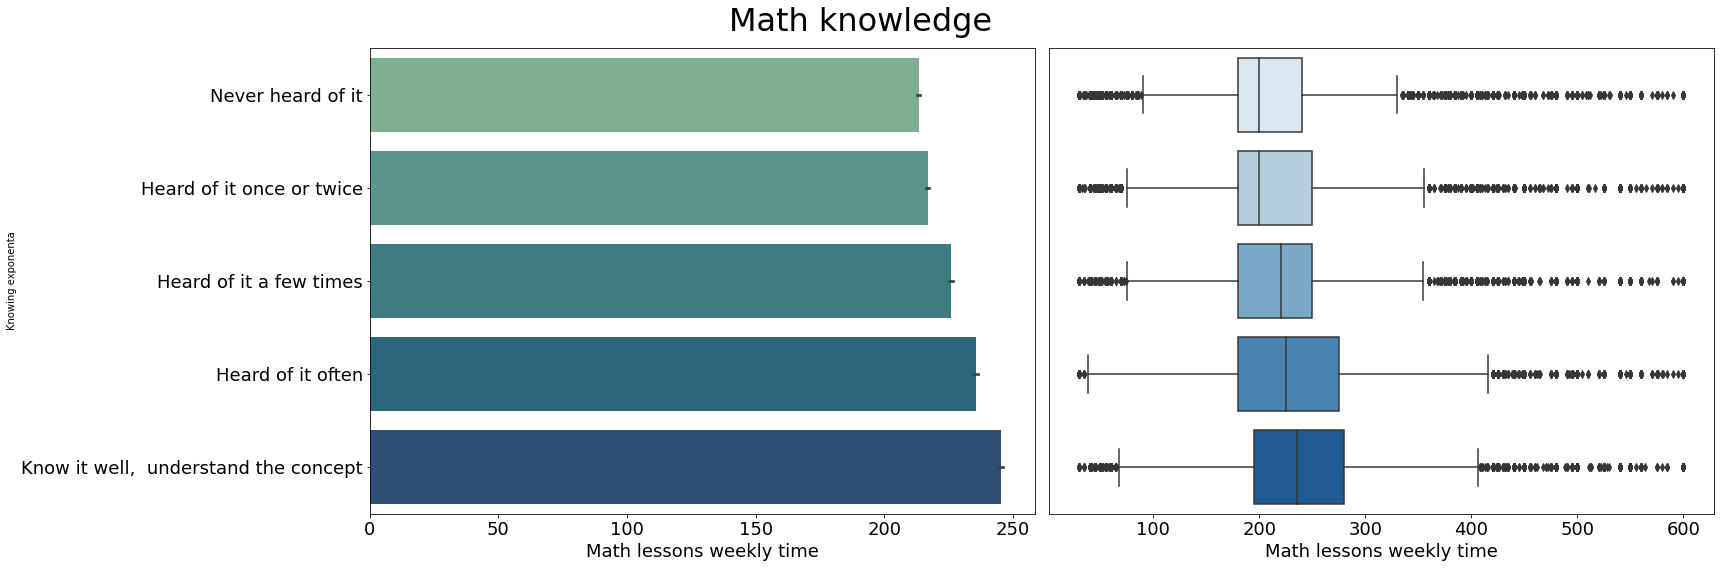

In [26]:
fig, axes = plt.subplots(1, 2, figsize=[24, 8]);

fig.suptitle("Math knowledge", fontsize=32);
sb.barplot(data=pisa_data, y='ST62Q01', x='math_time', ax=axes[0], palette="crest");
sb.boxplot(data=pisa_data, x='math_time', y='ST62Q01', ax=axes[1], palette="Blues");
axes[0].tick_params(axis='both', which='both', labelsize=18);
axes[1].tick_params(axis='both', which='both', labelsize=18);
axes[0].set_ylabel(labels['ST62Q01'][1]);
axes[0].set_xlabel('Math lessons weekly time', fontsize=18);
axes[1].set_xlabel('Math lessons weekly time', fontsize=18);
axes[1].set_ylabel("");
axes[1].set_yticks([]);
plt.tight_layout();
plt.savefig("bivar3.png");

Most interesting is boxplot - it's clear that top "math timers" are in group who never heard about exponenta. It looks strange - you spend a lot of time for math lesson but doesn't know one of the most common and basic function.


In [496]:
#Let's have a look on some stats of math time for our groups
def quantile99(ins):
    return ins.quantile(q=0.99)

pisa_data.groupby(by='ST62Q01').math_time.agg([pd.Series.max,quantile99])

,max,quantile99
ST62Q01,,
Never heard of it,2400.0,540.0
Heard of it once or twice,2220.0,571.1
Heard of it a few times,1600.0,600.0
Heard of it often,1800.0,600.0
"Know it well, understand the concept",1800.0,600.0


It is clear that groups "Never heard of it" and "Heard of it once or twice" have more great outliers than the others.

So, let's look on boxplot without outliers

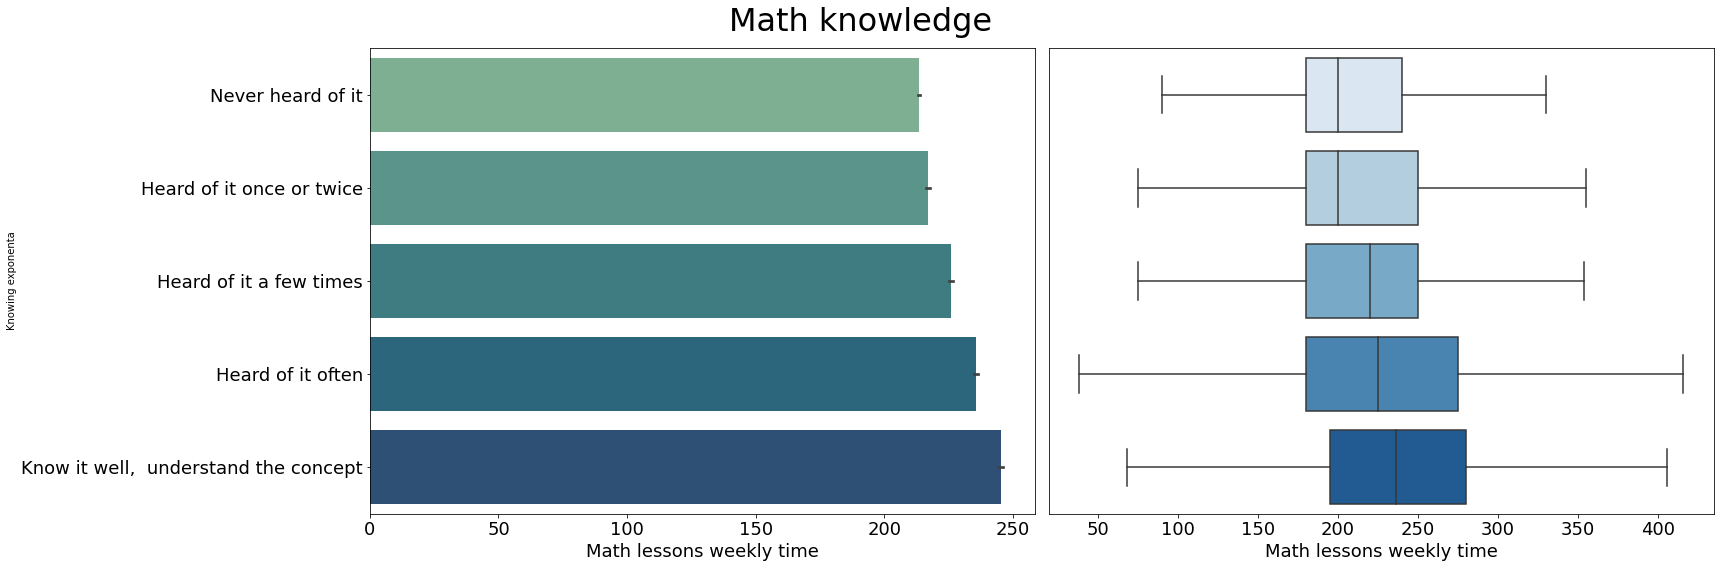

In [27]:
fig, axes = plt.subplots(1, 2, figsize=[24, 8]);

fig.suptitle("Math knowledge", fontsize=32);
sb.barplot(data=pisa_data, y='ST62Q01', x='math_time', ax=axes[0], palette="crest");
sb.boxplot(data=pisa_data, x='math_time', y='ST62Q01', ax=axes[1], palette="Blues",showfliers = False);
axes[0].tick_params(axis='both', which='both', labelsize=18);
axes[1].tick_params(axis='both', which='both', labelsize=18);
axes[0].set_ylabel(labels['ST62Q01'][1]);
axes[0].set_xlabel('Math lessons weekly time', fontsize=18);
axes[1].set_xlabel('Math lessons weekly time', fontsize=18);
axes[1].set_ylabel("");
axes[1].set_yticks([]);
plt.tight_layout();
plt.savefig("bivar4.png");

Without outliers we have more "expected" picture - the more you learn, than more you know. One more interesting point - it seems that math lessons weekly time distribution seems to be right-skewed (IQC is not symmetrical aroud the mean). Let's get some metrics.

In [28]:
pisa_data.groupby(by='ST62Q01').math_time.agg([pd.Series.mean,pd.Series.mode])


,mean,mode
ST62Q01,,
Never heard of it,213.392967,180.0
Heard of it once or twice,216.898075,180.0
Heard of it a few times,225.814187,180.0
Heard of it often,235.549630,180.0
"Know it well, understand the concept",245.243292,180.0


We see that while the mode is the same for all groups, the mean is going bigger as growth in students's awareness of exponenta.

### Numerical variables

In [29]:
numeric_vars=['PV1MATH','PV1READ','PV1SCIE','math_time']

First of all, let's have a look on correlation table of our numerical variables.

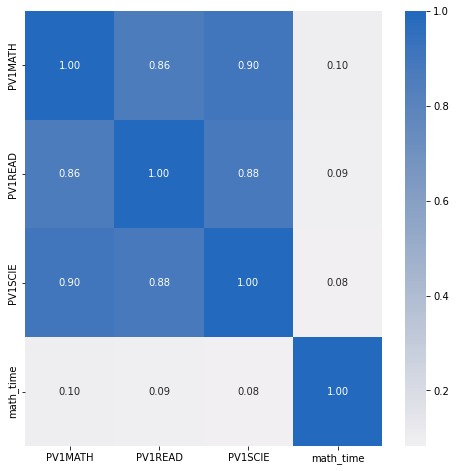

In [107]:
plt.figure(figsize=[8, 8])
sb.heatmap(pisa_data[numeric_vars].corr(), annot=True, fmt=".2f", cmap="vlag_r", center=0);

Two main conclusions:
* test results in different fields are correlated with each other
* surprisingly, math_time doesn't correlated even to results in math.

Text(0, 0.5, 'PV1MATH')

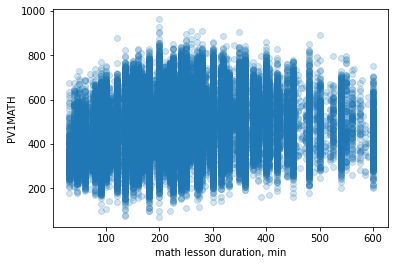

In [114]:
#let's look on scatter plot for math lessons duration and test results in Math
plt.scatter(data=pisa_data,y='PV1MATH',x='math_time', alpha=0.2)
plt.xlabel('math lesson duration, min')
plt.ylabel('PV1MATH')

total number of observations (482128, 7)
sample size (3000, 7)


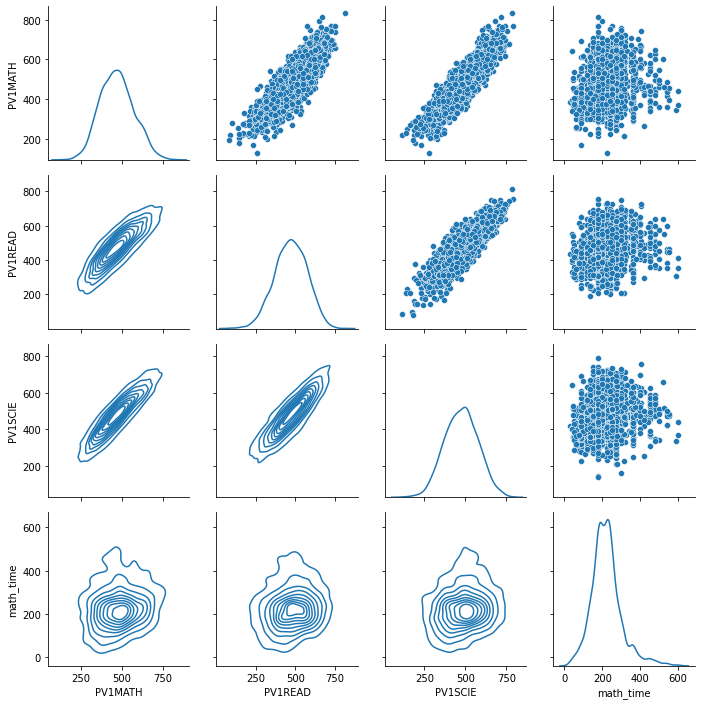

In [31]:
# plot matrix: sample 3000 students so that plots are clearer and they render faster
print("total number of observations", pisa_data.shape)
data_samp = pisa_data.sample(n=3000, replace=False)
print("sample size", data_samp.shape)

g = sb.PairGrid(data=data_samp, vars=numeric_vars)
g.map_diag(sb.kdeplot)
g.map_upper(sb.scatterplot)
g.map_lower(sb.kdeplot);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* as expected - higher math results are associated wuth deeper knowledge of exponenta function and with longer time of learning math (on average).
* results in three test are correlated with each other.
* we found that test results in science is significantly worse for whose students, who never have access to Internet or get access in the age 13+ (it means less than 2 years expirience in Internet - PISA is designed for 15-years old students).We are going to look deeper at this variable in next session

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* however, quantity of books at home behaves not so straightforward - according to test results in reading posessing more books doesn't lead you to higher results.
* interestingly - top valued otliyers in terms of duration of math lesson per week are in group "doesn't know exponenta". Frankly speaking, I think it is, first of all, question of

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

We saw that results in test in Science corresponds with the age access to the Internet. let's compare result in Math and Reading in of two groups of studens - who get access to Internet at age 13+ and who at 6 or earlier. Does the Internet at the childhood provide some value for student?  


In [72]:
pisa_data_13=pisa_data[(pisa_data['IC04Q01']=='13 years old  or older')]
pisa_data_6=pisa_data[(pisa_data['IC04Q01']=='6 years old or younger')]
df_6_13 = pd.concat([pisa_data_13, pisa_data_6], ignore_index=True)
df_6_13['IC04Q01'] = df_6_13['IC04Q01'].cat.remove_unused_categories()

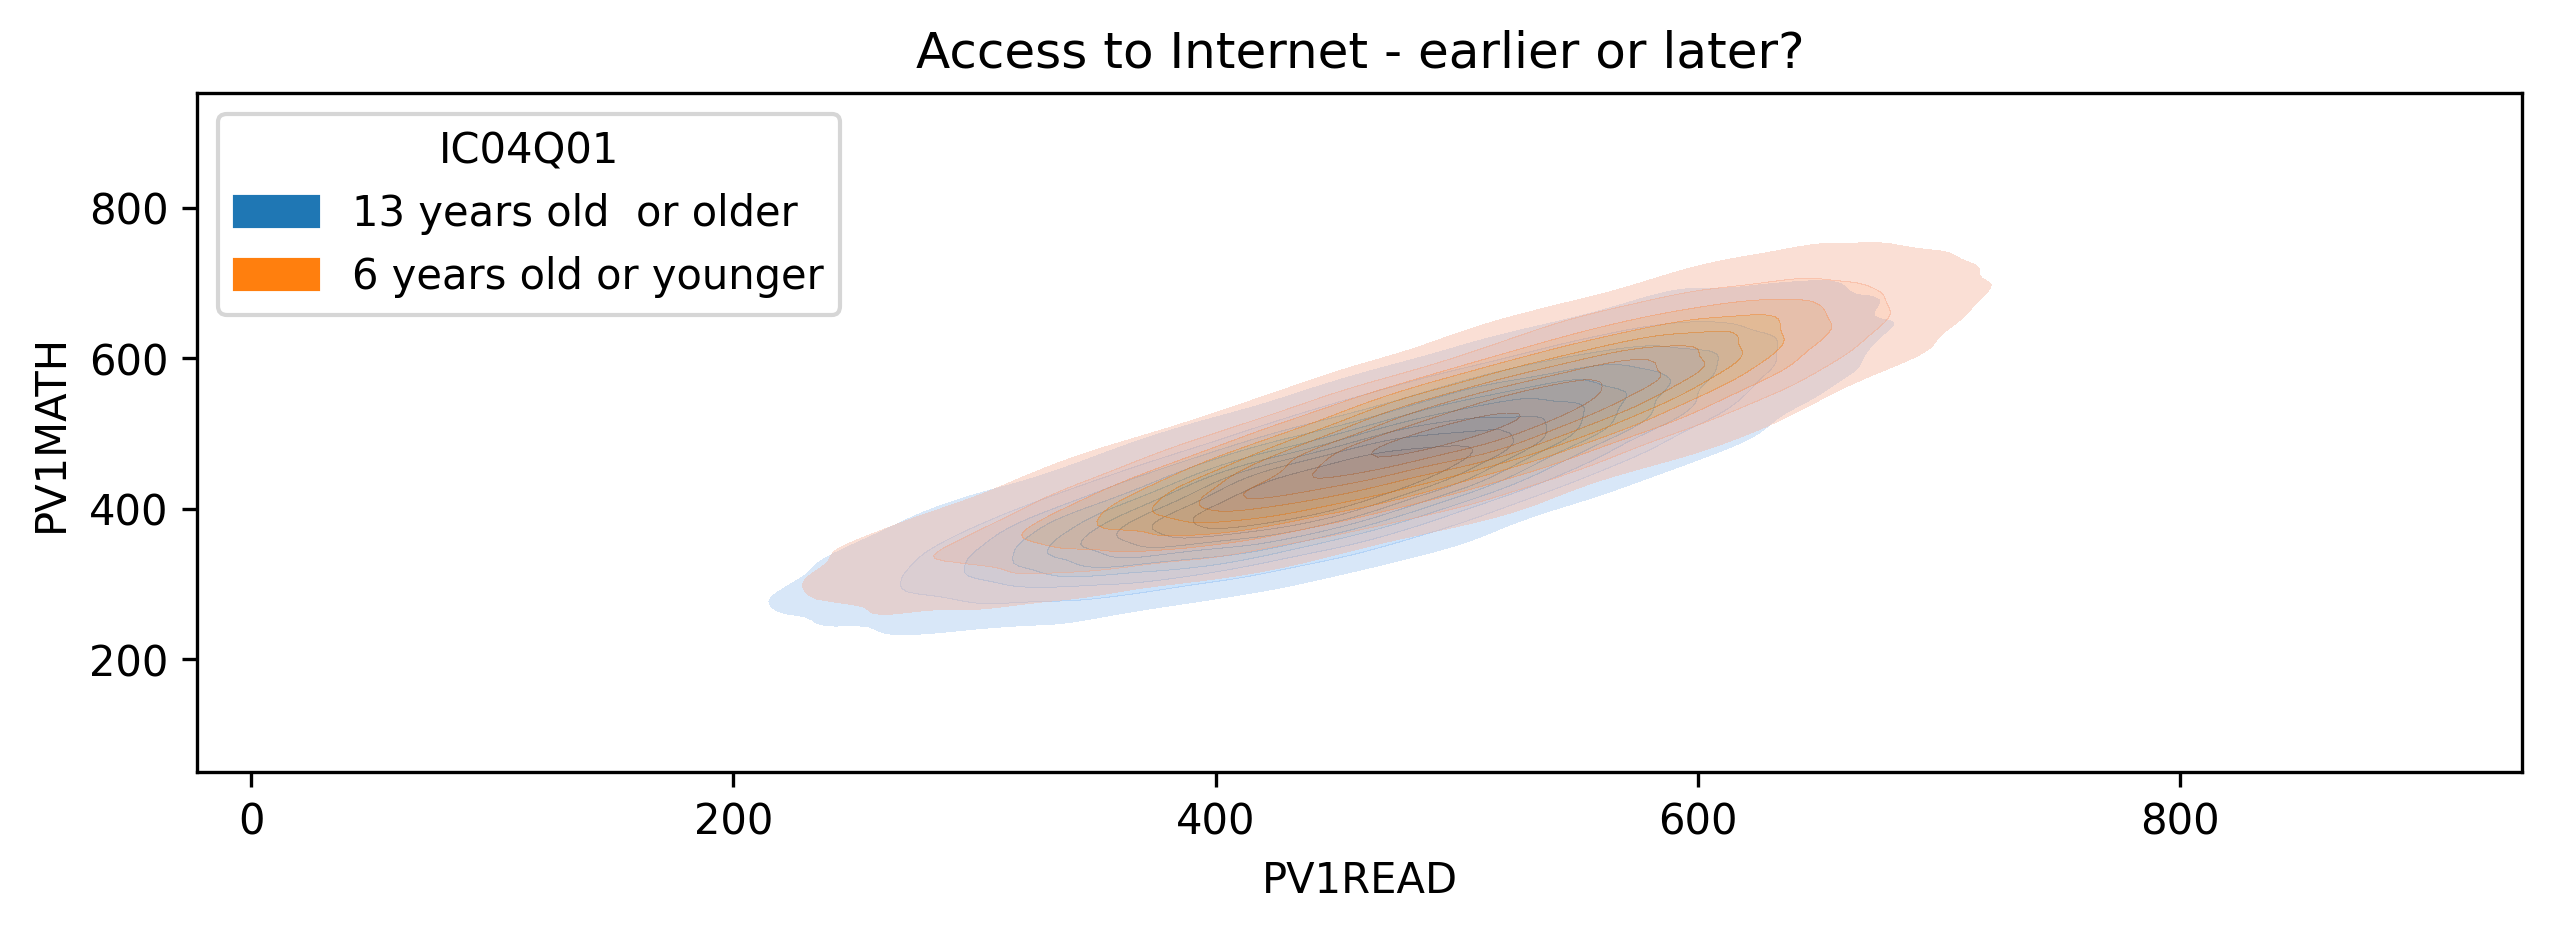

In [73]:
fig, ax = plt.subplots(1, 1, figsize=[10, 3], dpi=300)
sb.kdeplot(
    y="PV1MATH", x="PV1READ", hue='IC04Q01', data=df_6_13, alpha=0.4, fill=True, ax=ax
)
ax.set_title("Access to Internet - earlier or later?")
#ax.legend(title='Age of access to the Internet', labels=['6 years or younger','13+years'])
sb.move_legend(ax,loc='upper left')
plt.savefig("multivar.png")

We see that top results in math and reading (more than 600 points) are more likely to students who are internet users from their baby time.
Now, let's do the same with 'ST28Q01' - quantity of books at home, we are going to look deeper on two catefories: '0-10 books' and '101-200 books'

In [76]:
pisa_data_books_low=pisa_data[(pisa_data['ST28Q01']=='0-10 books')]
pisa_data_books_many=pisa_data[(pisa_data['ST28Q01']=='101-200 books')]
pisa_data_books = pd.concat([pisa_data_books_low, pisa_data_books_many], ignore_index=True)
pisa_data_books['ST28Q01'] = pisa_data_books['ST28Q01'].cat.remove_unused_categories()

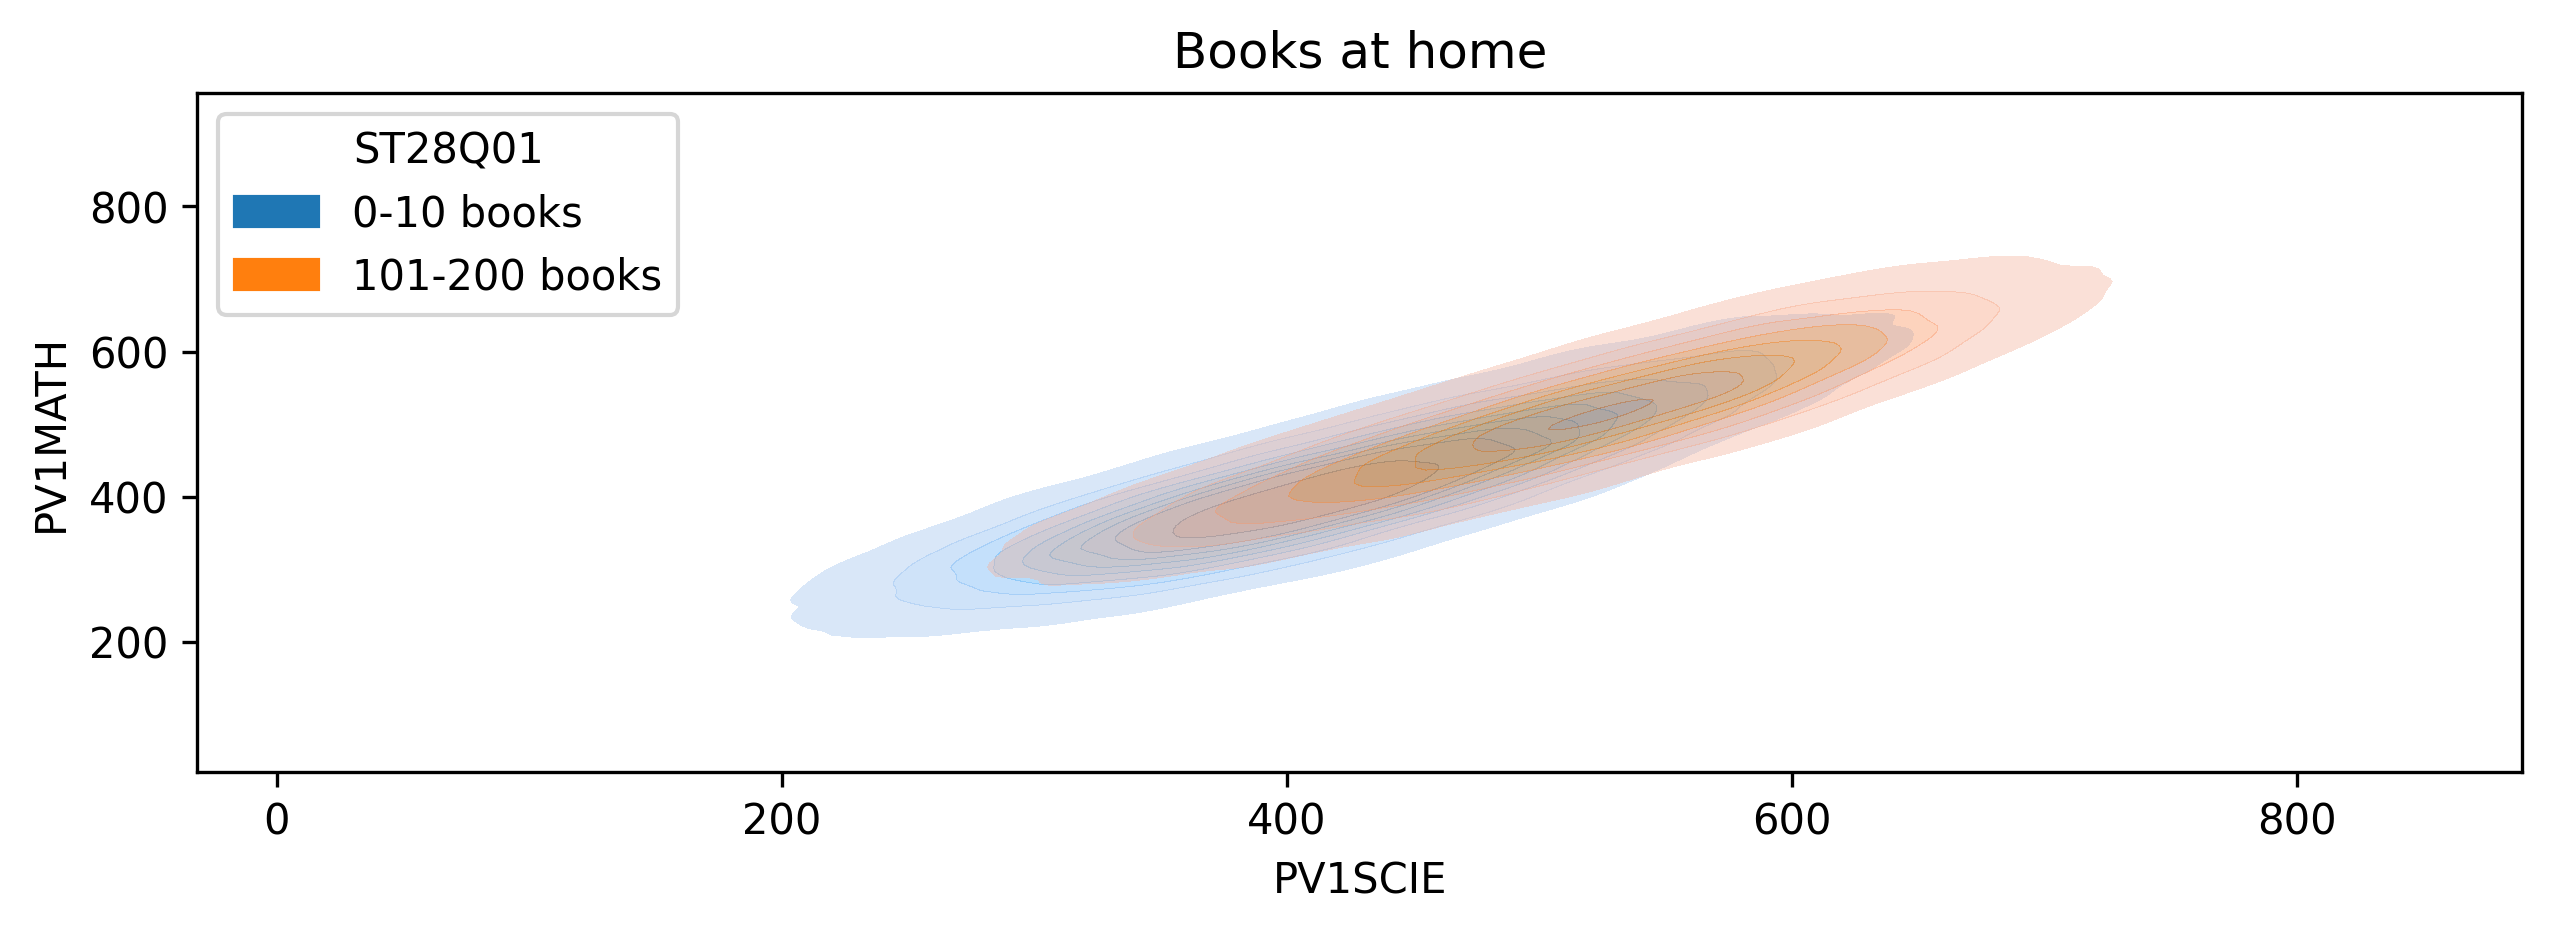

In [77]:
fig, ax = plt.subplots(1, 1, figsize=[10, 3], dpi=300)
sb.kdeplot(
    y="PV1MATH", x="PV1SCIE", hue='ST28Q01', data=pisa_data_books, alpha=0.4, fill=True, ax=ax
)
ax.set_title("Books at home")
sb.move_legend(ax,loc='upper left')
plt.savefig("multivar2.png")

It seems clear - that students with 100+ books at home - outperform students with a few books at home.
Now let's look what can "age of access" and "knowledge of exponenta" tell together about math results.  

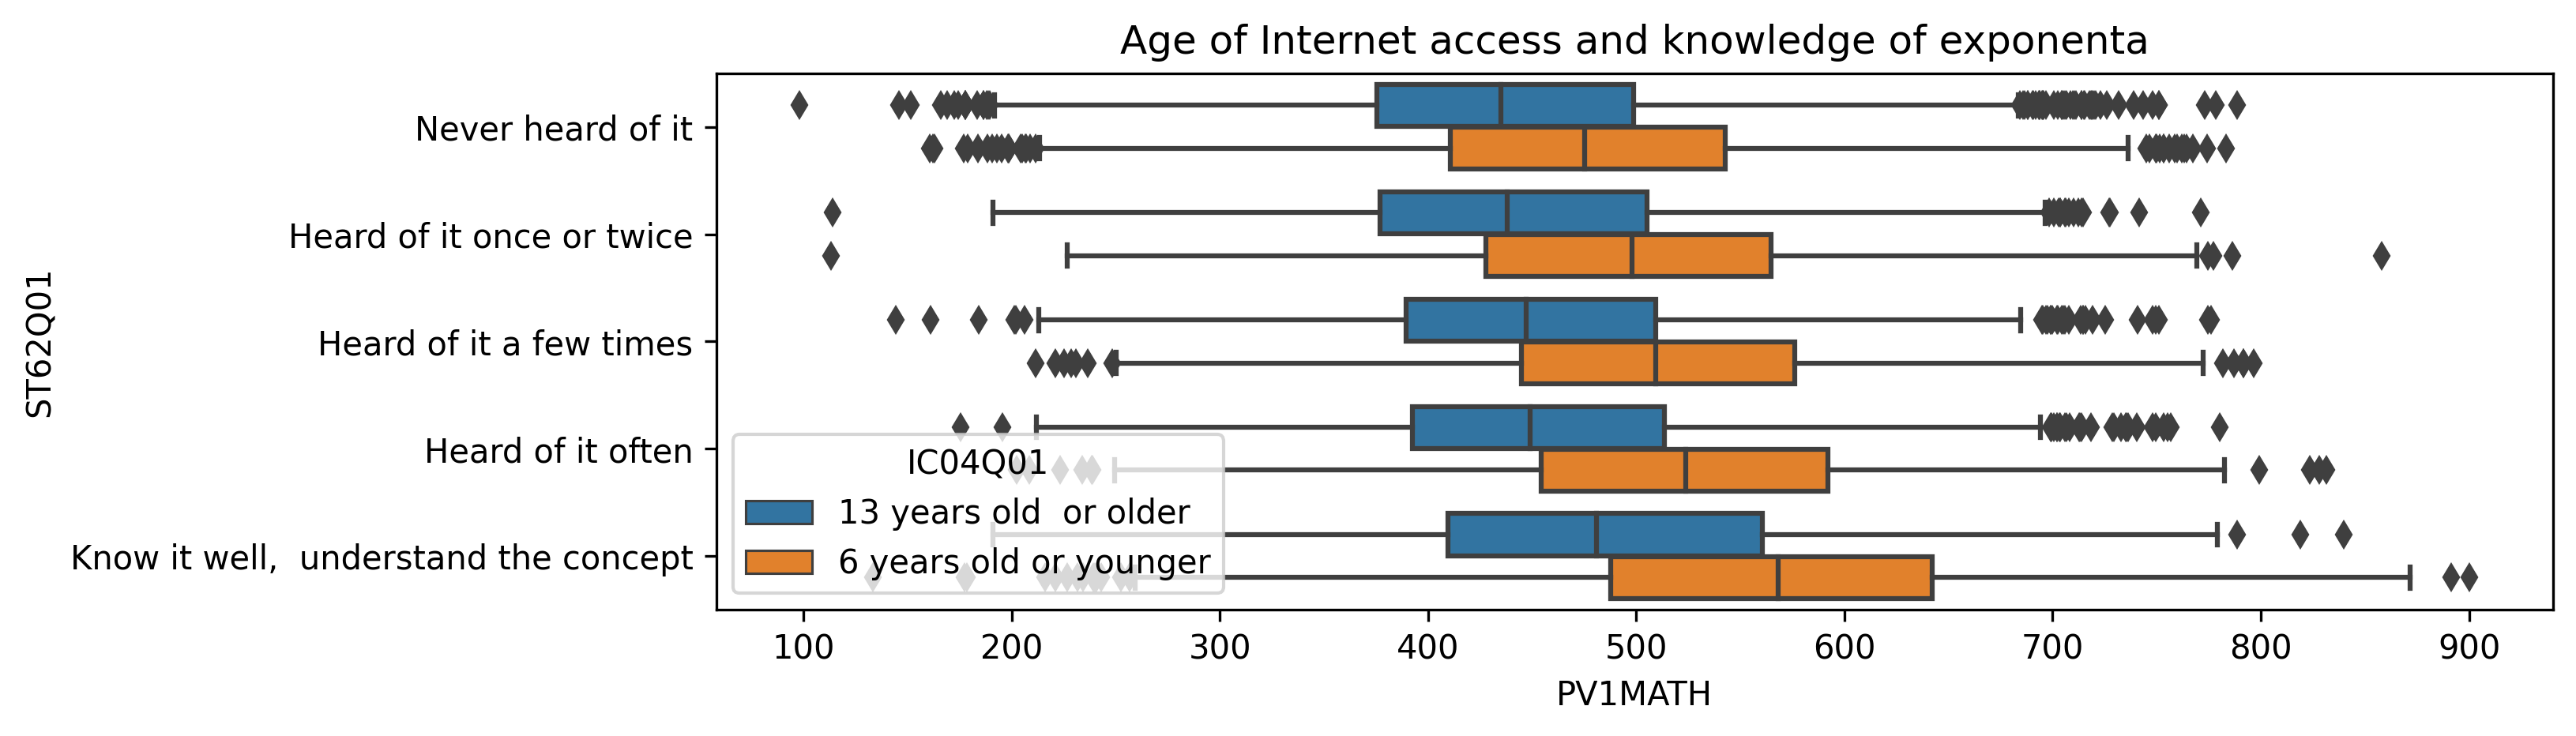

In [81]:
fig, ax = plt.subplots(1, 1, figsize=[10, 3], dpi=300)
sb.boxplot(data=df_6_13, y="ST62Q01", x="PV1MATH", hue="IC04Q01", ax=ax)
sb.move_legend(ax,loc='lower left')

ax.set_title("Age of Internet access and knowledge of exponenta");

It is very intersting - it seems that "age of access" is more important in terms of math results than knowledge of exponenta. With the same knowledge - students with early access demonstrate significantly hidger results.
However, let's check is there such relationship for all categories of "age of access".


[None, None]

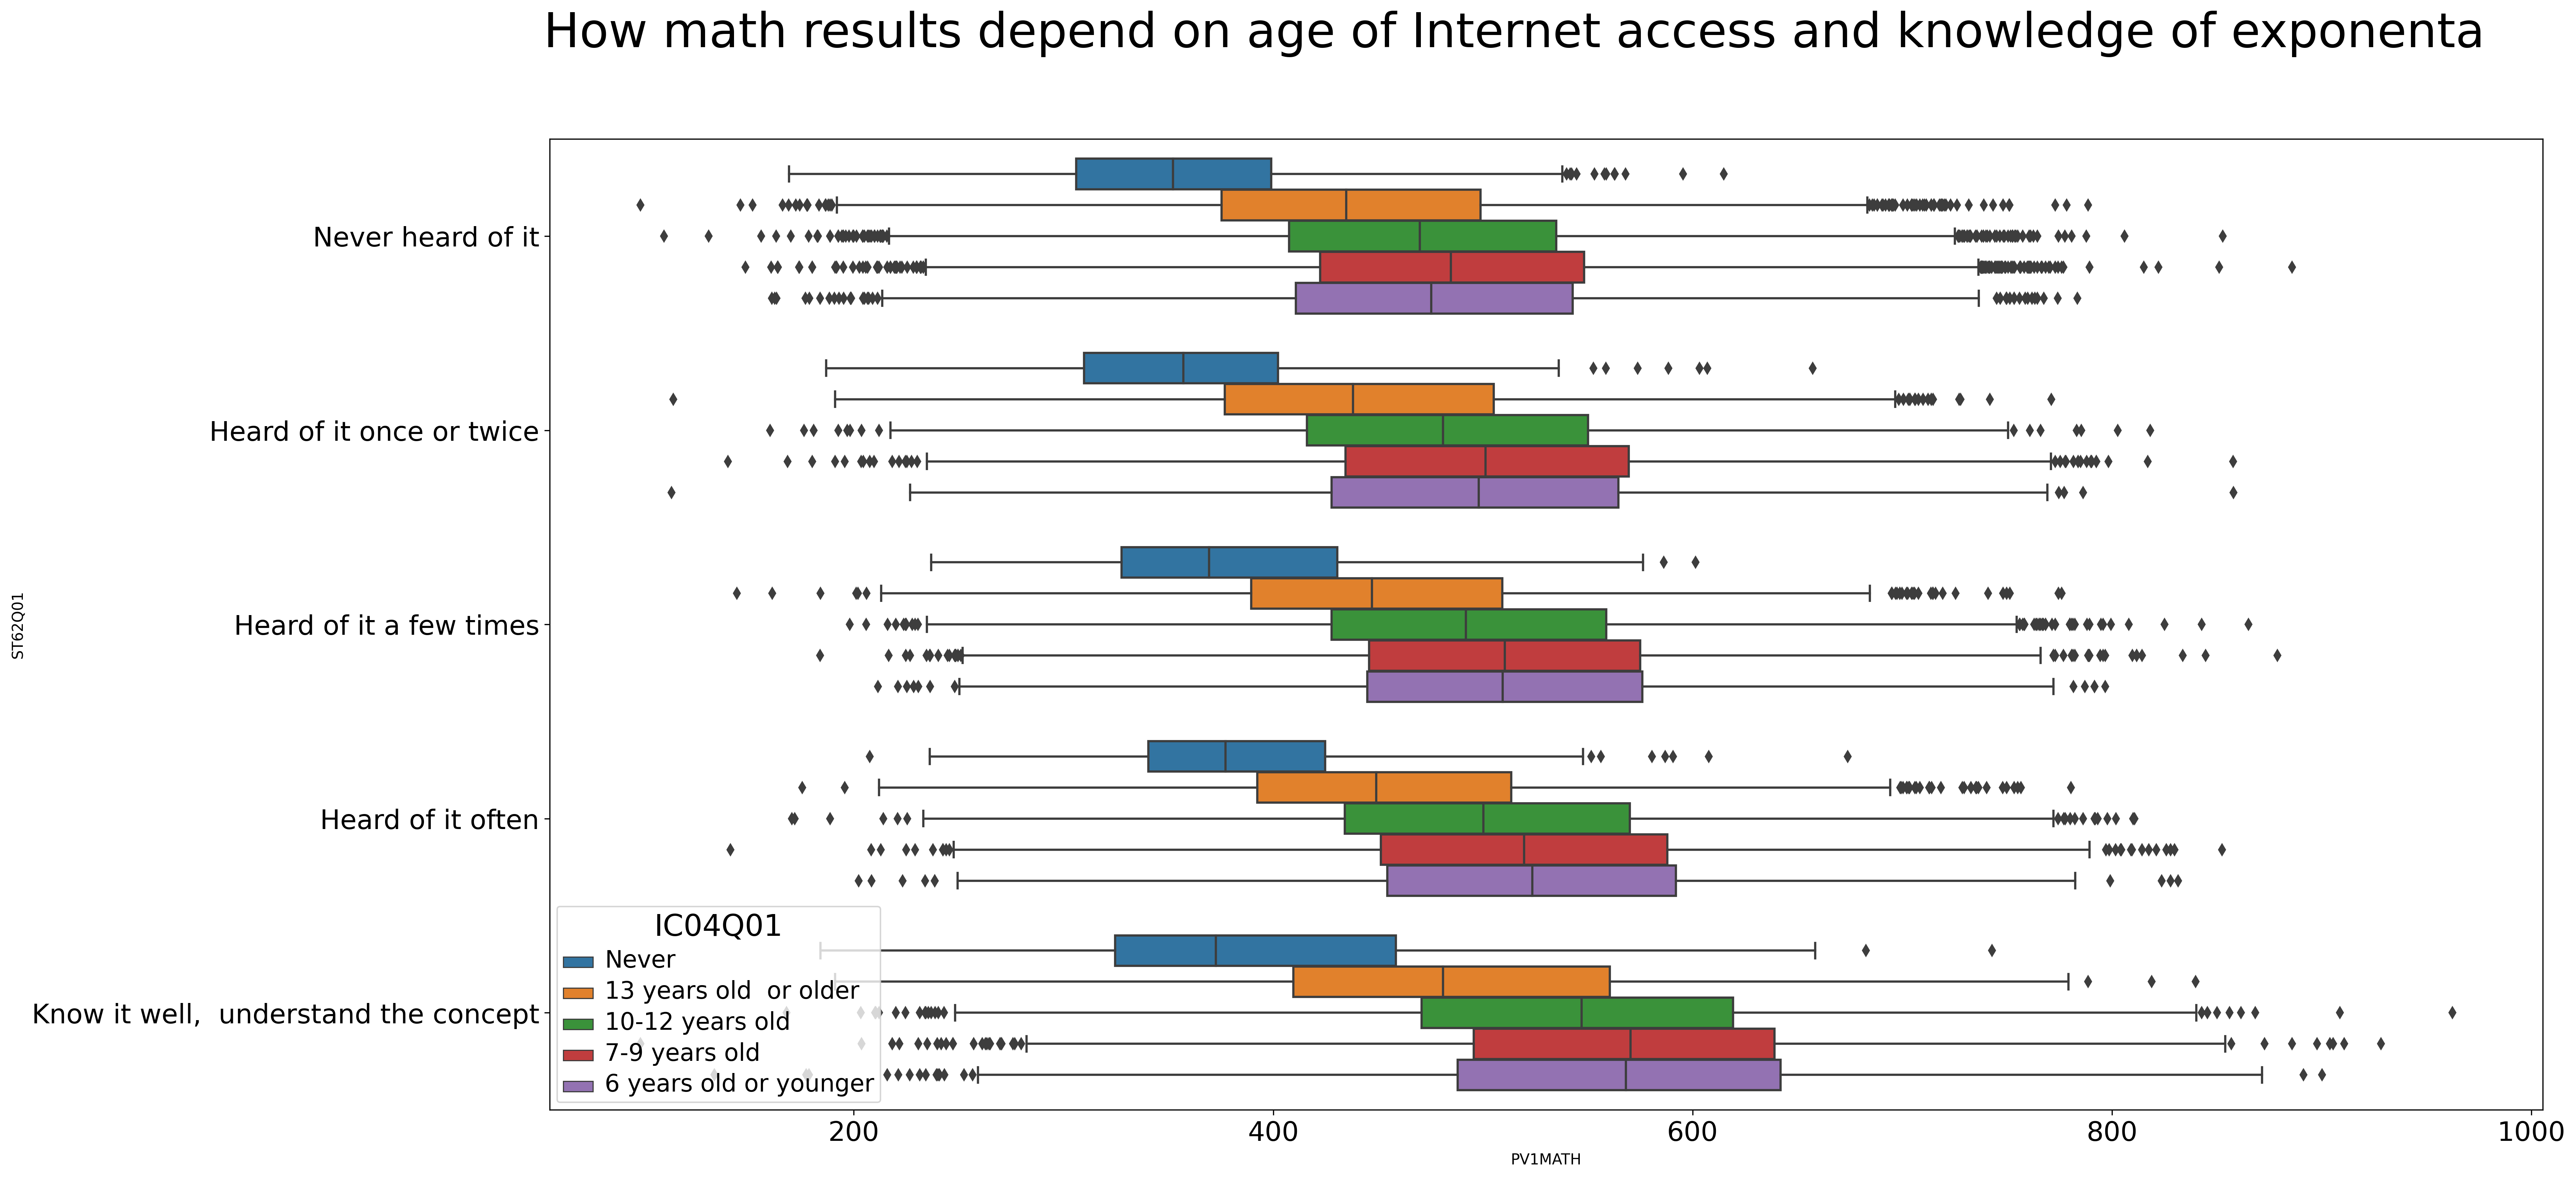

In [102]:
fig, ax = plt.subplots(1, 1, figsize=[24, 12], dpi=300)
sb.boxplot(data=pisa_data, y="ST62Q01", x="PV1MATH", hue="IC04Q01", ax=ax)
sb.move_legend(ax,loc='lower left')
ax.tick_params(axis='both', which='both', labelsize=18);
fig.suptitle("How math results depend on age of Internet access and knowledge of exponenta",fontsize=32);
plt.setp(ax.get_legend().get_texts(), fontsize='16');
plt.setp(ax.get_legend().get_title(), fontsize='20');

#ax.set_title();

It seems cleat that two groups (in terms of age of access) are differ very much from the others - student who never get access to Internet or who get access in the age 13+

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

It seems that age of access to Internet is very important in terms of PISA results. We can say, that if student didn't get access to the Internet up to the age 12 - he or she probably will have comparatively low results. 

### Were there any interesting or surprising interactions between features?

A lot of books at home doesn't add value - on contrary, results of students with 500+ books are slightly lower than results of student with 200-500 books at home

## Conclusions
Some key points:
* All test results are normally distributed
* Dataset contains a lot of missing values. For about 50% of records answers weren't given for 30-40% of questions.
* Test results in math doesn't directly correlated to duration of math lessons.
* Student who didn't get access to the Internet before age 13 demonstrate significantly lower results. However, it possible is example of correlation and not of causality. Probably, there is some other reasons that influence both - learning (and, as result, PISA test outcomes) and age of access to the Internet.




Text(0, 0.5, 'PV1MATH')

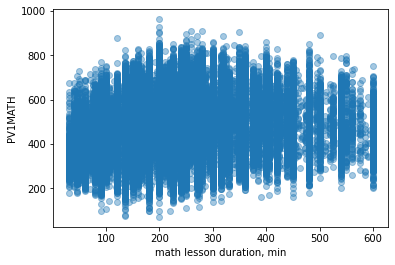